In [1]:
import numpy as np 
#产生正态分布的数据100组，中心点（0，0），其标准差σ为1
p=np.random.randn(100,2)
#将中心点移动到（2.5,2.5），作为正类
for i in range(100):
    p[i][0]+=2.5
    p[i][1]+=2.5

#产生正态分布的数据100组，中心点（0，0），其标准差σ为1，作为负类
f=np.random.randn(100,2)

In [2]:
import pandas as pd 

#将np数组转换成dataframe
df_p=pd.DataFrame(p,columns=['x','y'])
#加上标签z,正类标签1
df_p['z']=1
#加上正类的颜色红
df_p['c']='red'

#将np数组转换成dataframe
df_f=pd.DataFrame(f,columns=['x','y'])
#加上标签z,负类标签0
df_f['z']=0
#加上负类的颜色红
df_f['c']='blue'

#将正负类合并成一个dataframe
res = pd.concat([df_p, df_f], axis=0)
res

,x,y,z,c
0,4.108224,3.848929,1,red
1,2.342511,2.953446,1,red
2,0.789860,2.732742,1,red
3,2.842918,3.590247,1,red
4,3.097725,3.576919,1,red
5,3.661894,3.350869,1,red
6,2.317196,2.281296,1,red
7,2.117827,1.821161,1,red
8,1.042247,2.022398,1,red
9,1.350079,4.057907,1,red


In [3]:
import matplotlib.pyplot as plt
x = res['x']
y = res['y']
c = res['c']

#绘制出数据集的散点图
plt.scatter(x,y,color=c, marker="o")

plt.xlabel('x')
plt.ylabel('y')
plt.title('random data')
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
#重置数据集索引，应为合并后数据索引重复
res.reset_index(inplace=True, drop=True)
#取索引是4的整数倍的的数据做为测试集
test=res[(res.index%4==0)]
#取索引不是4的整数倍的的数据做为训练集
train=res[(res.index%4!=0)]

In [5]:
#选择训练集的特征
X=train[['x','y']]
#选择训练集的标签
Z = train['z']

In [6]:
from sklearn import svm
#新建SVC分类器
clf = svm.SVC(kernel='linear')
#训练
clf.fit(X, Z)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
#在训练集上的准确率
clf.score(X, Z)

0.94

In [8]:
#在测试集上的准确率
clf.score(test[['x','y']],test['z'])

0.96

In [9]:
##################################准备作出svm的分类边界##################################
#求出数据集边界值
x_min, x_max = res["x"].min() - 1, res["x"].max() + 1
y_min, y_max = res["y"].min() - 1, res["y"].max() + 1

In [10]:
#生成网格点坐标矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),np.arange(y_min, y_max, 0.2))
xx,yy

(array([[-3.45982214, -3.25982214, -3.05982214, ...,  5.34017786,
          5.54017786,  5.74017786],
        [-3.45982214, -3.25982214, -3.05982214, ...,  5.34017786,
          5.54017786,  5.74017786],
        [-3.45982214, -3.25982214, -3.05982214, ...,  5.34017786,
          5.54017786,  5.74017786],
        ...,
        [-3.45982214, -3.25982214, -3.05982214, ...,  5.34017786,
          5.54017786,  5.74017786],
        [-3.45982214, -3.25982214, -3.05982214, ...,  5.34017786,
          5.54017786,  5.74017786],
        [-3.45982214, -3.25982214, -3.05982214, ...,  5.34017786,
          5.54017786,  5.74017786]]),
 array([[-3.48142786, -3.48142786, -3.48142786, ..., -3.48142786,
         -3.48142786, -3.48142786],
        [-3.28142786, -3.28142786, -3.28142786, ..., -3.28142786,
         -3.28142786, -3.28142786],
        [-3.08142786, -3.08142786, -3.08142786, ..., -3.08142786,
         -3.08142786, -3.08142786],
        ...,
        [ 5.31857214,  5.31857214,  5.31857214, ...,  

In [11]:
#将网格坐标矩阵组成未知标签的数据
gird=np.c_[xx.ravel(), yy.ravel()]
gird

array([[-3.45982214, -3.48142786],
       [-3.25982214, -3.48142786],
       [-3.05982214, -3.48142786],
       ...,
       [ 5.34017786,  5.71857214],
       [ 5.54017786,  5.71857214],
       [ 5.74017786,  5.71857214]])

In [12]:
#将预测未知标签的数据
label=clf.predict(gird)
label

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

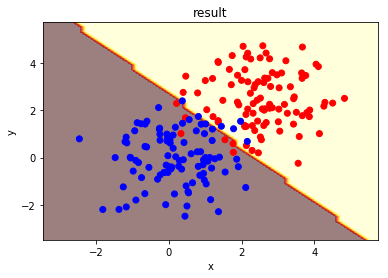

In [13]:
#将标签转换成和xx.shape相同的矩阵用于绘制等高线
label_2 = label.reshape(xx.shape)

#绘制等高线
plt.contourf(xx, yy,label_2, cmap='hot', alpha=0.5)
#绘制原始数据
plt.scatter(x,y,color=c, marker="o")

plt.xlabel('x')
plt.ylabel('y')
plt.title('result')
plt.show()